In [ ]:
from sympy import init_printing
init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [ ]:
import numpy as np
from auxiliares import *
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp

In [83]:
def u_osciloscopio_v(v, div, res):
    return combinada(uret(1e-3 + 0.1 * div + 0.03 * v), uret(res))

def u_osciloscopio_t(t, div, res):
    return combinada(uret(0.4e-6 + 0.04 * div + 0.0001 * t), uret(res))

In [84]:
import csv

def read_tek_csv(fname):
    times, samplesch1, samplesch2 = [], [], []
    hscale, vscale1, vscale2 = 0, 0, 0
    with open(fname, 'rt') as csvfile:
        c = csv.reader(csvfile)

        for row_num, row in enumerate(c):
            if row_num == 8:
                vscale1 = float(row[1])
                vscale2 = float(row[7])
            if row_num == 11:
                hscale = float(row[1])
            times.append(float(row[3]))
            samplesch1.append(float(row[4]))
            samplesch2.append(float(row[10]))

    return times, samplesch1, samplesch2, hscale, vscale1, vscale2

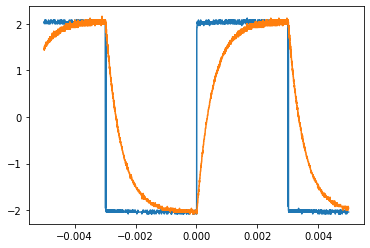

In [86]:
times, samples1, samples2, hscale, vscale1, vscale2 = read_tek_csv("prelims.csv")
tres = 1e-11
vres = 1e-7
ut = np.vectorize(lambda t : u_osciloscopio_t(t, hscale, tres))
uv = np.vectorize(lambda v : u_osciloscopio_v(v, vscale2, vres))
maxch2 = ufloat(max(samples2), uv(max(samples2)))
minch2 = ufloat(min(samples2), uv(min(samples2)))
ampch2 = maxch2 - minch2
plt.plot(times, samples1, times, samples2)
plt.show()

$$
V(t) = V_0 \exp\left(\frac{-t}{RC}\right)\\
\ln(V) = ln(V_0) - \frac{t}{RC}
$$

τ=(0.5194+/-0.0013)ms U=(4.006+/-0.015)V


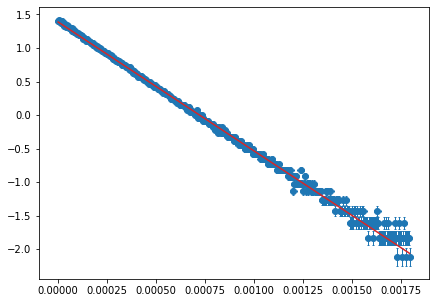

In [87]:
ioff = next(i for i, v in enumerate(samples1) if v < 0)
ion = next(i for i, v in enumerate(samples1) if v > 0 and i > ioff+5)

aj = 300
samplescut = np.array(samples2[ioff:ion-aj])
timescut = times[ioff:ion-aj]


samplescut = unp.uarray(samplescut, uv(samplescut)) - minch2

xdcg = unp.uarray(timescut, ut(timescut)) - ufloat(times[ioff], ut(times[ioff]))
ydcg = unp.log(samplescut)
minvtau, uminvtau, lnV0, ulnV0 = ajuste_odr_u(xdcg, ydcg)

tau = -1/ufloat(minvtau, uminvtau)
v0 = unp.exp(ufloat(lnV0, ulnV0))
print(f'τ=({tau*1000})ms', f'U=({v0})V')

faj = lambda x : minvtau*x + lnV0

xdcg_n = unp.nominal_values(xdcg)
xdcg_u = unp.std_devs(xdcg)
ydcg_n = unp.nominal_values(ydcg)
ydcg_u = unp.std_devs(ydcg)

fig = plt.figure(figsize=(7, 5))
ax = plt.axes()
ax.set_xlim(min(xdcg_n) - 1e-4, max(xdcg_n) + 1e-4)

plt.errorbar(xdcg_n, ydcg_n, xerr=xdcg_u, yerr=ydcg_u, fmt='o', linewidth=1, capsize=1)
plt.plot(xdcg_n, faj(xdcg_n), c='C3', zorder=10)
plt.show()

$$
V(t) = V_f \left[1-\exp\left(\frac{-t}{RC}\right)\right]\\
\ln(V_f - V) = ln(V_f) - \frac{t}{RC}
$$

τ=(0.5555+/-0.0026)ms U=(4.078+/-0.017)V


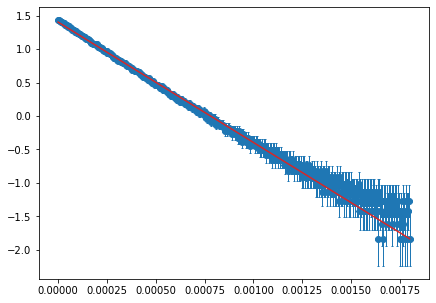

In [137]:
ion = next(i for i, v in enumerate(samples1) if v > 0 and samples1[i - 10] < 0 and i > 10)
ioff = next(i for i, v in enumerate(samples1) if v < 0 and i > ion + 5)

aj = 300
samplescut = np.array(samples2[ion:ioff-aj])
timescut = times[ion:ioff-aj]

ut = np.vectorize(lambda t : u_osciloscopio_t(t, hscale, tres))
uv = np.vectorize(lambda v : u_osciloscopio_v(v, vscale2, vres))

samplescut = unp.uarray(samplescut, uv(samplescut))

xdcg = unp.uarray(timescut, ut(timescut)) - ufloat(times[ion], ut(times[ion]))
ydcg = unp.log(maxch2 - samplescut)
minvtau, uminvtau, lnV0, ulnV0 = ajuste_odr_u(xdcg, ydcg)

tau = -1/ufloat(minvtau, uminvtau)
v0 = unp.exp(ufloat(lnV0, ulnV0))
print(f'τ=({tau*1000})ms', f'U=({v0})V')

faj = lambda x : minvtau*x + lnV0

xdcg_n = unp.nominal_values(xdcg)
xdcg_u = unp.std_devs(xdcg)
ydcg_n = unp.nominal_values(ydcg)
ydcg_u = unp.std_devs(ydcg)

fig = plt.figure(figsize=(7, 5))
ax = plt.axes()
ax.set_xlim(min(xdcg_n) - 1e-4, max(xdcg_n) + 1e-4)

plt.errorbar(xdcg_n, ydcg_n, xerr=xdcg_u, yerr=ydcg_u, fmt='o', linewidth=1, capsize=1)
plt.plot(xdcg_n, faj(xdcg_n), c='C3', zorder=10)
plt.show()

In [132]:
samples1[ioff+100]

-2.0